<h1 style="text-align:center;">PREDICTION MODELS FOR CUSTOMER CHURN IN SYRIATEL TELECOMMUNICATIONS COMPANY  </h1>

<div style="text-align:center;">
  <img src="Images/Telcos Business.jpg" alt="Telcos">
</div>

<h1 style="text-align:center;">BUSINESS UNDERSTANDING</h1>

The project endeavors to develop a predictive model for customer churn, with the primary objective of identifying customers who may be inclined to discontinue services. Stakeholders within the telecommunications industry, including marketing and sales teams, customer service departments, and upper management, stand to benefit substantially from the outcomes of the project. The project scope includes the development and evaluation of predictive models with the potential to significantly enhance customer retention and overall profitability of telcos.

<h2 style="text-align:center;">Overview of the Project</h2>



SyriaTel, a leading telecommunications firm, grapples with a customer 'churn' problem. The churn problem poses revenue and reputation risks to the company. To address this, SyriaTel seeks predictive insights and a reliable classifier model to anticipate customer churn effectively.

Specific Objectives:

1. To develop a binary classification model to predict whether a client will imminently terminate their relationship with SyriaTel.
2. Identify the factors influencing customer churn.
3. Select the optimal model for forecasting customer churn.

<h1 style="text-align:center;">DATA UNDERSTANDING</h1>

The dataset originates from SyriaTel Telecommunication company and was obtained from Kaggle (link: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data). It comprises 21 columns and 3333 rows. The columns have various attributes related to customer demographics, service usage, and churn behavior. The rows correspond to a recorded customer. The dataset encompasses both continuous and categorical variables. The target variable identified is "churn," with the remaining variables serving as predictors, excluding "state" and "phone number."

<h1 style="text-align:center;">DATA PREPARATION</h1>

<h2 style="text-align:center;">Exploratory Data Analysis (EDA) </h2>


In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the dataset from the 'Data' folder
data = pd.read_csv('Data/SyriaTel_Customer_Churn.csv')

# Display the first few rows of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Descriptive Statstics: Check the summary statistics of numerical values in the dataset and handle them appropriately.

In [22]:
# Summary statistics

data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Handle Missing Values: Check for missing values in the dataset and handle them appropriately (imputation, deletion, or other methods).

In [23]:
# Check for missing values

data.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [24]:
# Check data types of columns
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [25]:
# Convert 'churn' column to integer
data['churn'] = data['churn'].astype(int)


In [26]:
# Check the distribution of the target variable 'Churn'
data['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

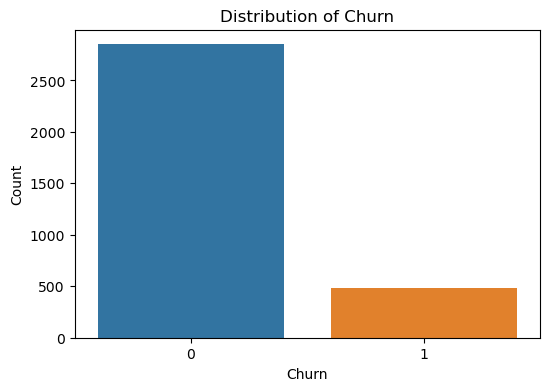

In [27]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


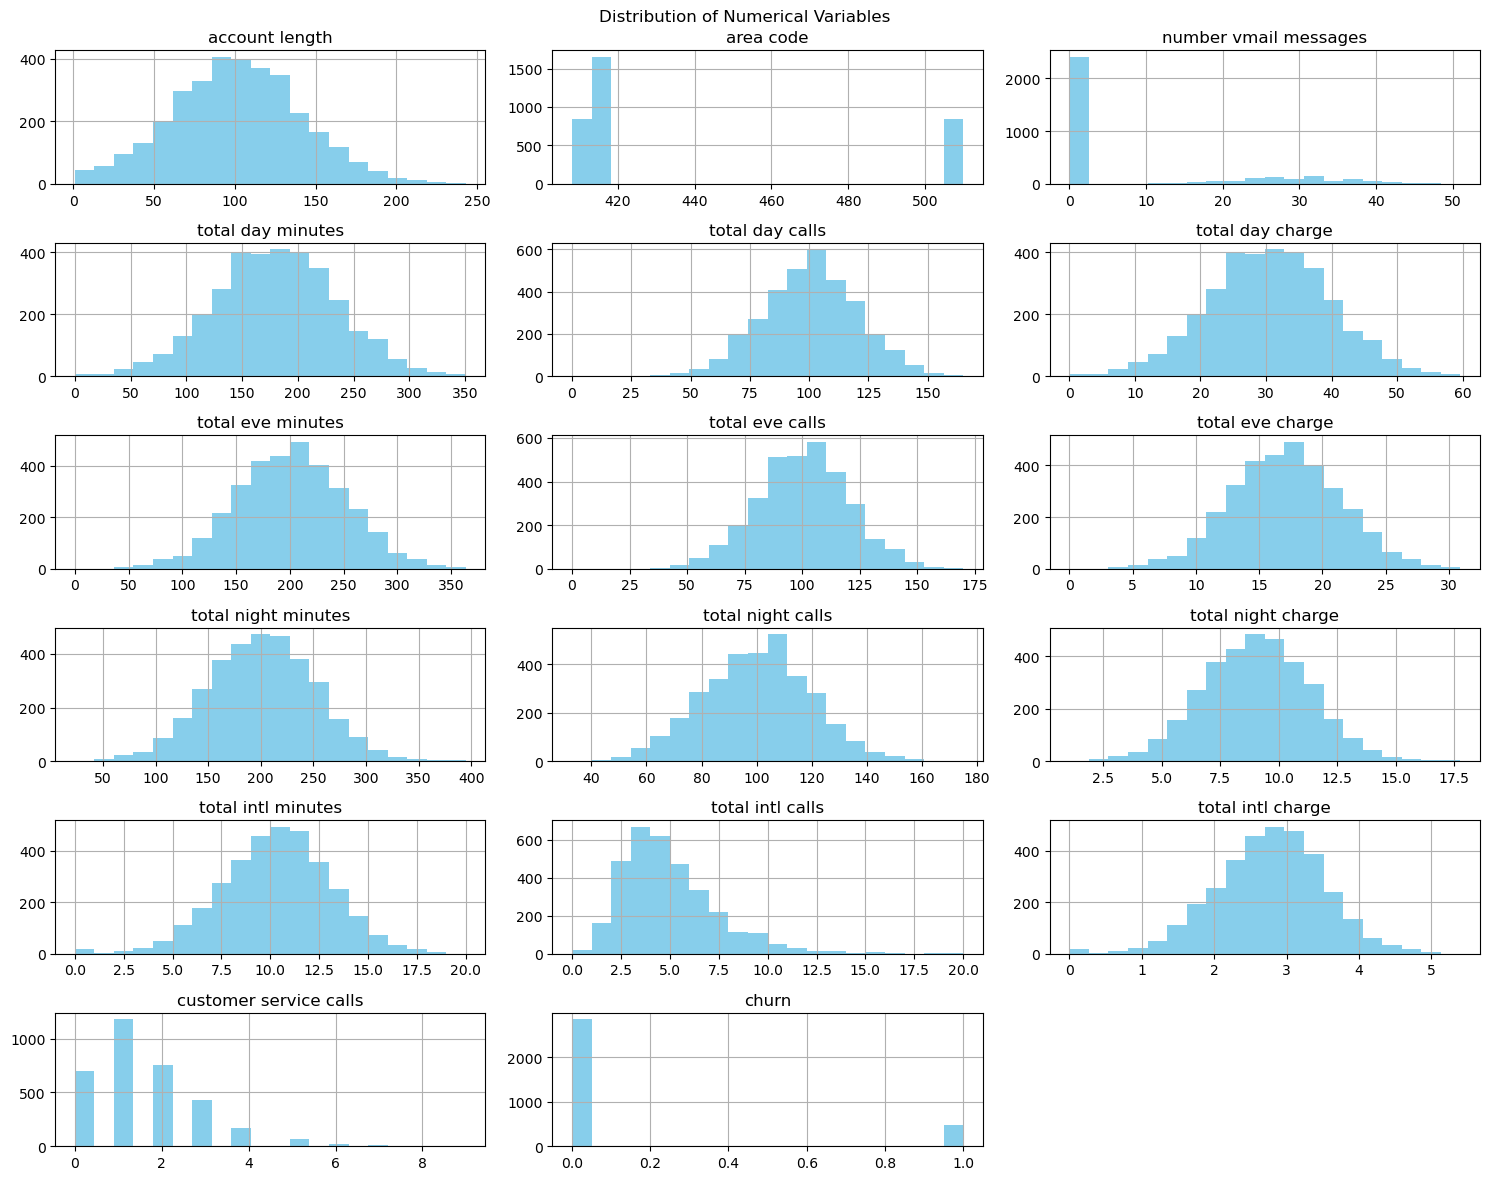

In [28]:
# Explore the distribution of numerical variables
# Select numerical columns
numerical_cols = data.select_dtypes(include='number').columns.tolist()

# Determine the layout based on the number of numerical columns
num_numerical_cols = len(numerical_cols)
nrows = (num_numerical_cols - 1) // 3 + 1
ncols = min(num_numerical_cols, 3)

# Create histograms for numerical variables
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    data[col].hist(ax=ax, bins=20, color='skyblue')
    ax.set_title(col)

# Remove empty subplots
for i in range(num_numerical_cols, nrows * ncols):
    fig.delaxes(axes[i])

plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()
plt.show()

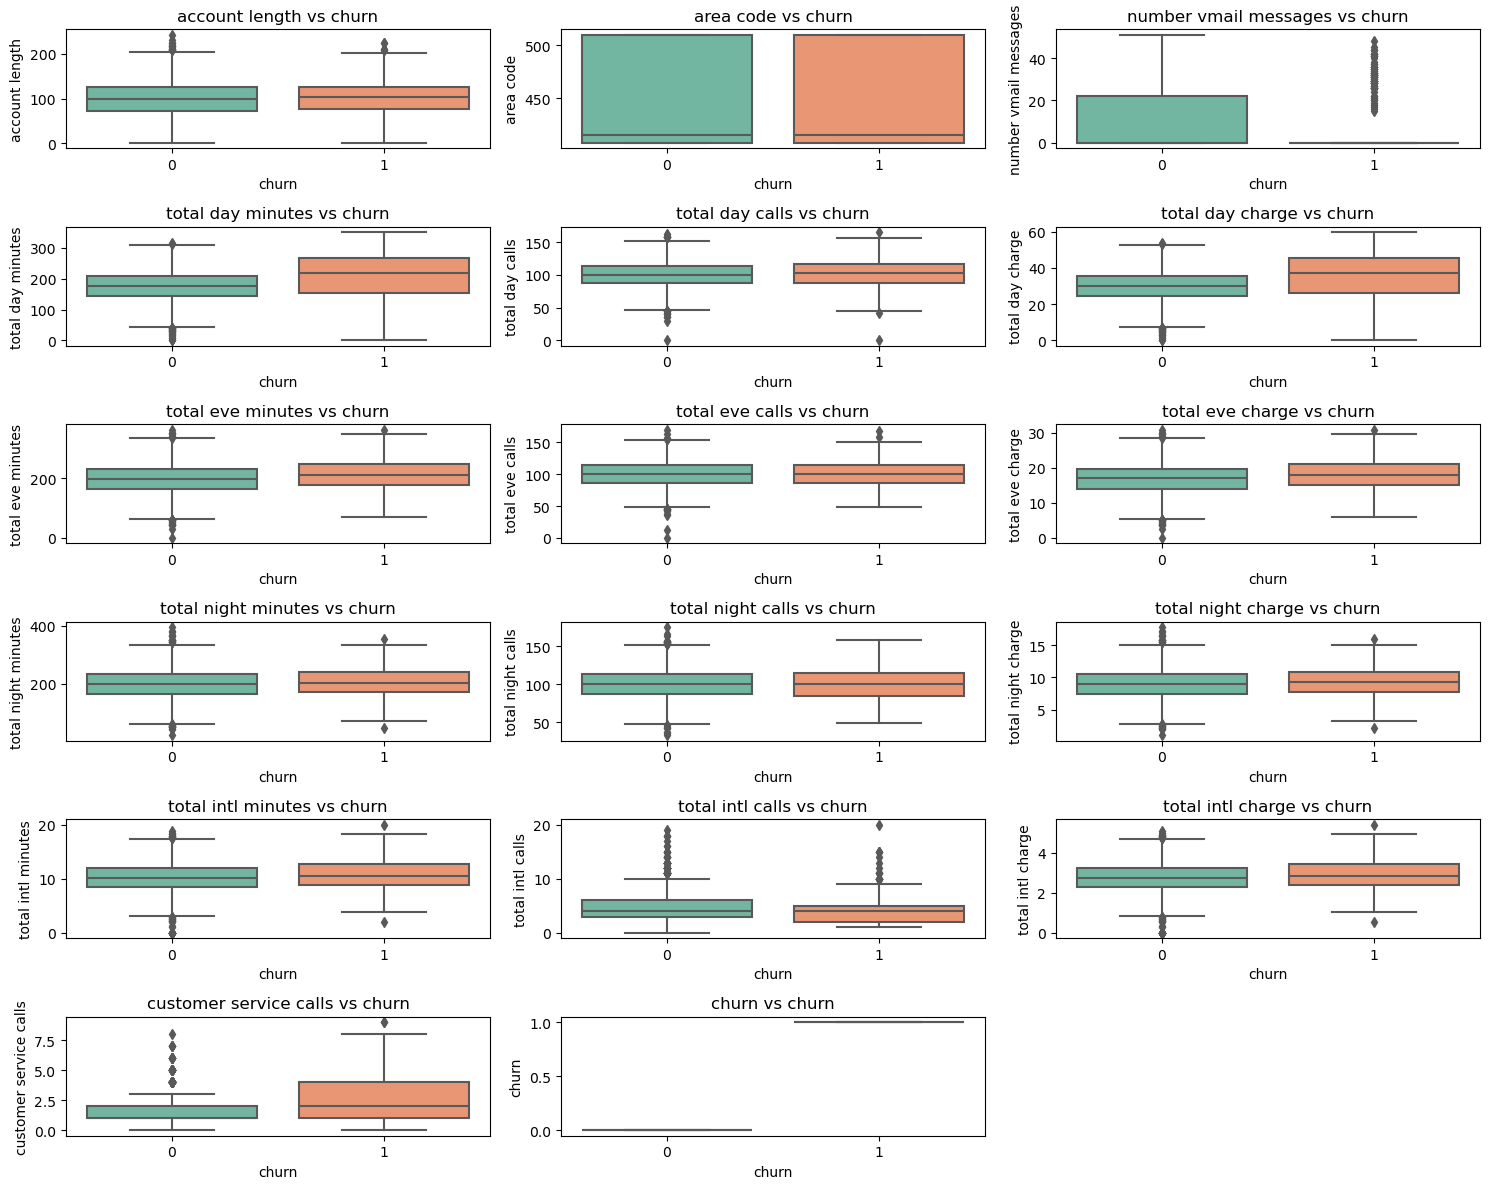

In [29]:
# Explore the relationship between numerical variables and the target variable 'Churn'

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols - 1) // 3 + 1

# Create subplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x='churn', y=col, data=data, palette='Set2')
    plt.title(f'{col} vs churn')

# Adjust layout
plt.tight_layout()
plt.show()

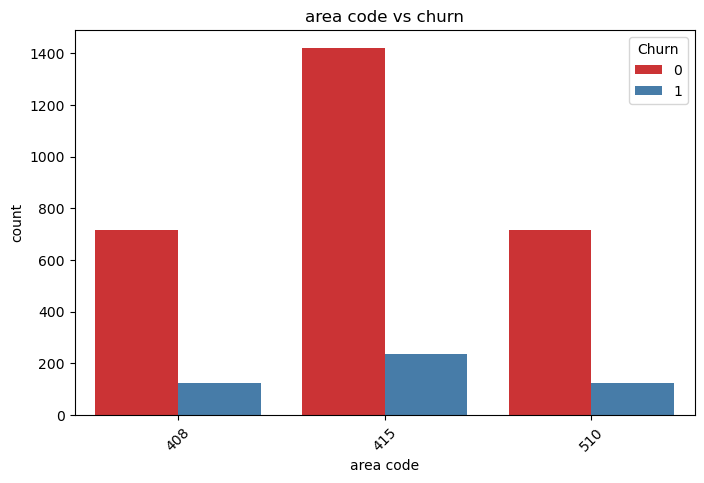

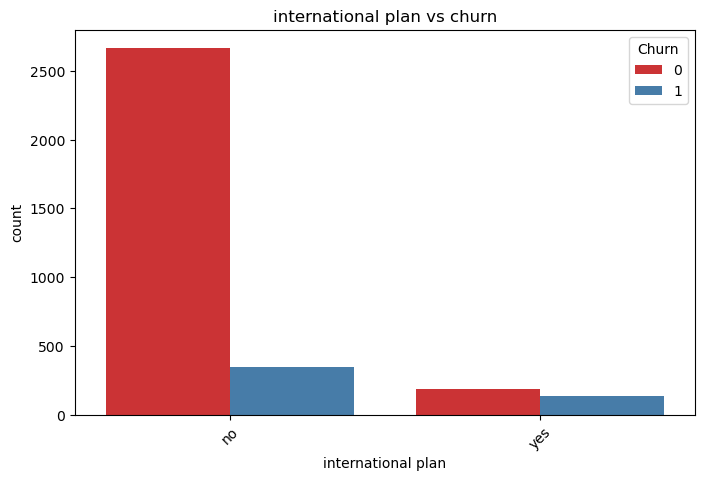

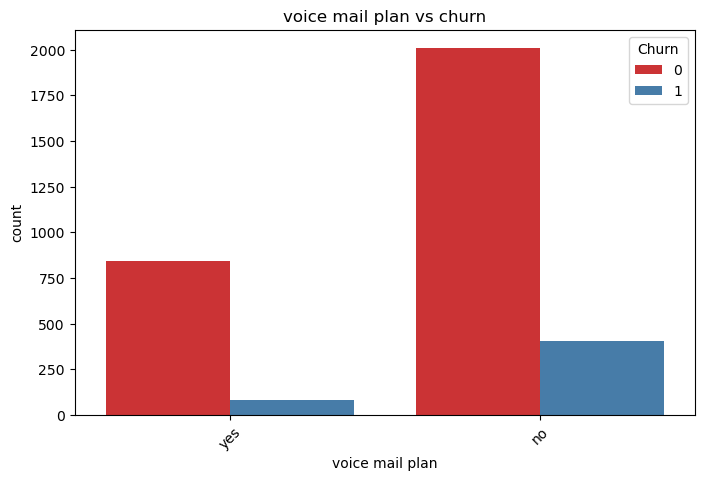

In [30]:
# Explore the relationship between categorical variables and the target variable 'Churn'

# Convert boolean values in 'churn' column to strings
data['churn'] = data['churn'].astype(str)

# Select relevant categorical columns excluding 'churn'
categorical_cols = ['area code', 'international plan', 'voice mail plan']

# Create countplots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='churn', data=data, palette='Set1')
    plt.title(f'{col} vs churn')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()